In [80]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians,asin
import matplotlib.dates as mdates
import matplotlib as mpl
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from tqdm import tqdm_notebook
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import gc
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [72]:
#Set working directory
os.chdir("C:/Data science/Project/Santander Customer Transaction")
os.getcwd()

'C:\\Data science\\Project\\Santander Customer Transaction'

In [113]:
#load the data
Cus_train=pd.read_csv("Santander_sample_train.csv")
Cus_test=pd.read_csv("Santander_sample_test.csv")
#Cus_train=pd.read_csv("train.csv")
#Cus_test=pd.read_csv("test.csv")

In [114]:
Cus_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_53101,0,9.5779,-1.1448,10.2103,5.4965,11.8547,-6.4545,3.9606,20.1943,...,2.0992,7.4005,1.4860,2.9914,20.7762,3.3457,6.4024,8.5164,18.7698,-11.6723
1,train_74424,0,15.1904,-5.0451,8.9406,6.2433,12.9933,-9.0867,4.4992,21.8463,...,1.2199,10.4225,1.2206,7.4935,21.8600,-1.3075,7.4112,10.6903,18.0640,-1.2149
2,train_114569,0,10.2005,-3.9381,12.2580,6.0077,12.3780,-3.0878,3.4989,14.5860,...,5.6270,8.6169,2.0449,9.3725,18.0556,-0.6128,0.9046,9.6364,14.7799,11.6834
3,train_181638,1,14.5489,-9.2185,7.4017,8.1763,10.7966,-7.8961,4.9425,20.5848,...,10.9613,2.1076,-0.2924,-2.4299,18.8107,2.2323,14.2430,8.4075,12.9844,2.5465
4,train_40335,0,13.1928,-3.4527,15.6737,6.6761,12.3140,-18.6930,4.4340,17.4016,...,0.4596,9.6509,1.0417,2.9048,18.1864,-0.4896,-0.0624,9.5451,18.6588,-19.0305


In [8]:
Cus_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_53101,14.5931,-3.4130,12.2206,8.5927,12.2787,-0.1066,7.6984,17.3913,7.0487,...,1.1445,4.6880,2.0873,0.1363,19.2292,1.4261,-6.4313,9.0598,12.9742,-3.1827
1,test_74424,5.9114,-3.4779,12.8391,6.7811,12.9037,-10.6888,5.0967,11.8057,-4.4972,...,3.5339,5.1530,0.5066,6.9793,16.6887,0.9170,7.1355,9.7038,13.1813,5.4344
2,test_114569,12.3714,0.3485,13.6545,6.6014,8.8026,-10.0313,3.9339,17.6041,5.0323,...,4.5799,7.4630,1.1041,5.2236,15.4507,-0.8760,3.1354,9.3337,9.0674,14.2244
3,test_181638,12.8432,-1.1132,15.9820,7.3991,11.8261,-3.8494,5.6762,13.3164,-3.3855,...,6.4316,4.5648,2.8416,8.3364,14.7570,1.7532,7.8354,8.2817,12.5065,8.8211
4,test_40335,7.9607,-0.9999,13.9064,5.1675,8.7360,-8.4352,4.3069,13.5813,2.9485,...,3.6217,15.8179,1.1864,-3.1983,19.2546,0.1152,13.9836,7.9041,11.8314,-3.1253


In [9]:
Cus_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 15.4+ MB


In [10]:
Cus_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 15.3+ MB


In [115]:
Cus_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.100000,10.711108,-1.555085,10.725959,6.772222,11.081709,-4.973792,5.399651,16.501349,0.213851,...,3.220615,7.419514,1.923874,3.348032,17.967702,-0.125835,2.325853,8.904356,15.889900,-3.261658
std,0.300015,3.012779,4.012982,2.656336,2.031230,1.625017,7.859571,0.860520,3.457357,3.309414,...,4.557838,3.024710,1.484084,4.008411,3.155545,1.440739,5.448067,0.928939,2.995748,10.367058
min,0.000000,1.186200,-14.696200,2.789200,0.597300,5.943000,-26.351500,2.385700,6.584600,-8.983600,...,-13.454700,-0.937600,-3.515900,-9.887000,9.649200,-4.433200,-13.508400,6.324800,6.558700,-37.696200
25%,0.000000,8.502200,-4.621375,8.744250,5.259750,9.918275,-11.035950,4.758975,13.817975,-2.344025,...,-0.042125,5.144700,0.879050,0.576950,15.606375,-1.169225,-1.822000,8.238075,13.859650,-11.188925
50%,0.000000,10.546550,-1.498500,10.576200,6.778400,11.112300,-4.666550,5.375800,16.410000,0.299700,...,3.135800,7.357400,1.878100,3.404250,17.935950,-0.177600,2.447400,8.881500,15.910200,-2.745050
75%,0.000000,12.778675,1.389600,12.508925,8.273000,12.242950,1.034025,5.995250,19.099325,2.840875,...,6.414200,9.492425,2.952500,6.239000,20.376700,0.862725,6.546850,9.594850,18.071700,4.917875
max,1.000000,19.464000,8.553000,18.326100,12.674000,15.843300,16.939800,7.928400,27.397100,8.631800,...,17.342600,16.289600,7.611600,16.237200,26.671200,4.082900,14.572400,11.832900,25.685200,23.876400


In [12]:
Cus_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10.705713,-1.579591,10.725522,6.790928,11.062078,-5.071369,5.404619,16.541806,0.226165,7.560088,...,3.203806,7.449769,1.939969,3.321719,18.033297,-0.141370,2.362241,8.905582,15.931850,-3.313788
std,3.051148,4.081132,2.650834,2.067572,1.609057,7.893001,0.865800,3.434089,3.323748,1.240798,...,4.546520,3.049154,1.493199,4.014542,3.126021,1.441264,5.453217,0.920792,2.987404,10.468773
min,1.482700,-14.321300,3.436800,-0.022400,5.989200,-27.191600,2.846600,7.631000,-8.657000,4.243300,...,-11.927200,-1.462700,-2.874200,-9.026000,9.849500,-4.325900,-13.610100,6.418300,7.436800,-34.605000
25%,8.500175,-4.694100,8.749125,5.212250,9.893650,-11.186875,4.763100,13.971400,-2.357575,6.610875,...,-0.105950,5.163250,0.875775,0.610175,15.668125,-1.180275,-1.962475,8.246300,13.861500,-11.381875
50%,10.502550,-1.522900,10.578200,6.823150,11.063600,-4.969600,5.381450,16.430700,0.256400,7.604450,...,3.176250,7.335800,1.911850,3.430900,17.988600,-0.165900,2.517850,8.881450,16.014850,-2.886250
75%,12.772125,1.445900,12.546700,8.361975,12.218500,0.910800,5.988575,19.094250,2.878350,8.581325,...,6.365175,9.531725,2.967300,6.187375,20.409700,0.832525,6.612600,9.589275,18.094625,4.914850
max,20.064900,8.752900,18.714100,12.947600,16.037100,17.212700,7.995400,28.292800,8.756900,10.913000,...,15.633800,16.288000,7.001400,16.590900,26.681500,3.942500,15.862700,11.981700,24.307000,27.531900


# Exploratory Data Analysis

At first glance we have many uncharacterized numerical features, their names has the prefix "var_" and they are 200 in numbers. There are so many variables that some histograms will shed light to their numerical appearance.



In [116]:
Cus_train.target.value_counts()

0    9000
1    1000
Name: target, dtype: int64

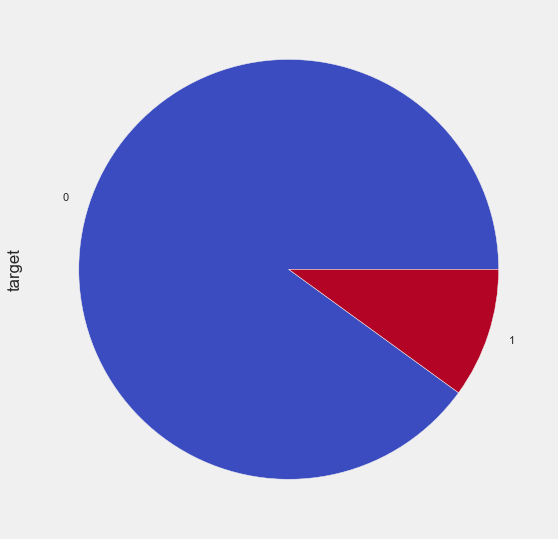

In [117]:
#checking the target variable distribution with pie chart 
Cus_train['target'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

Here we have imbalanced data set 

In [118]:
numerical_features = Cus_train.columns[2:]

Distributions columns


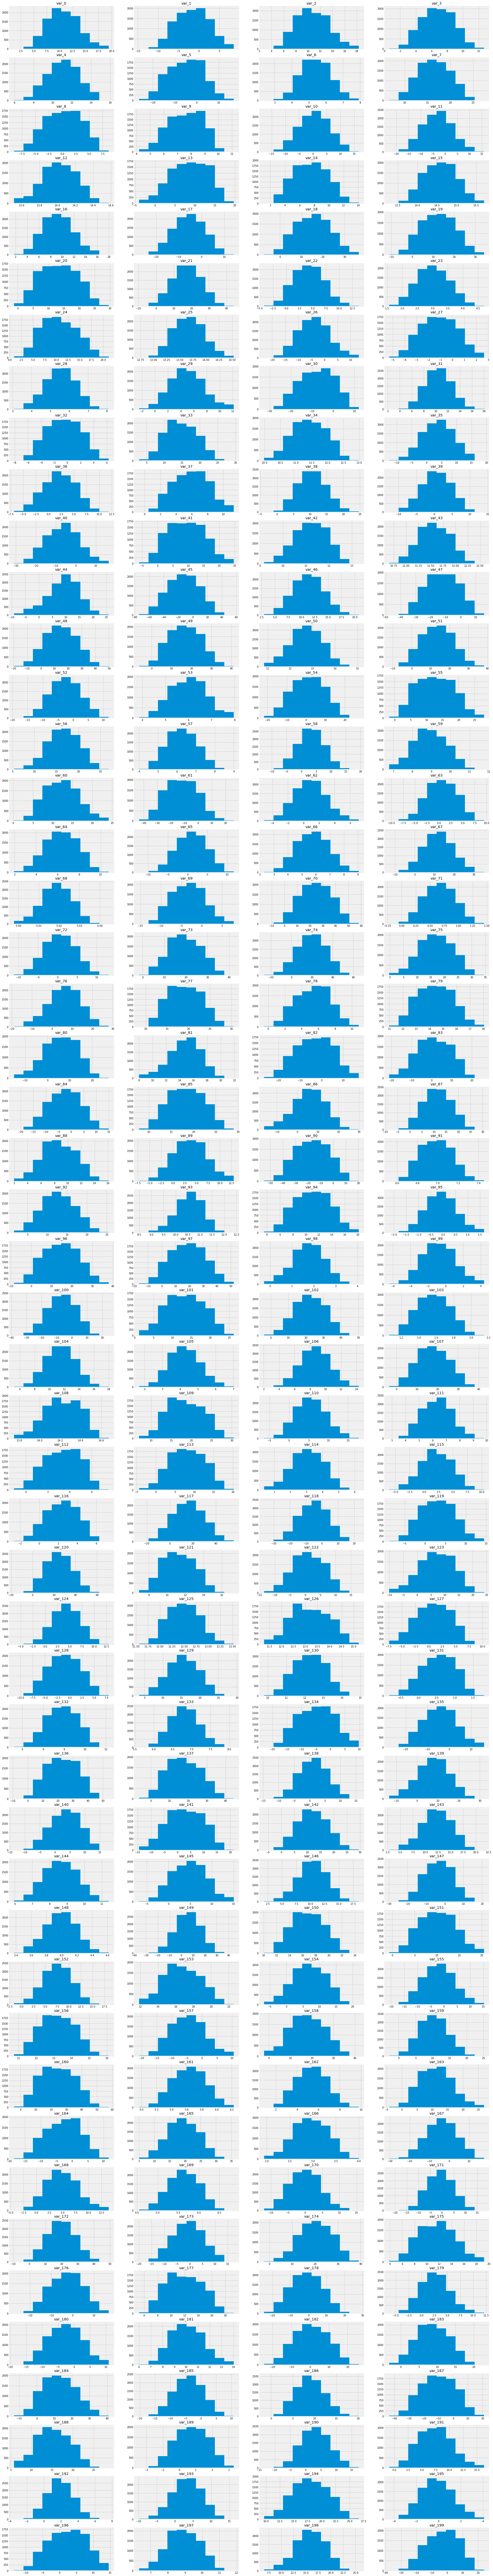

In [16]:
#checking the distribution of the variables 
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(Cus_train[col]) 
    plt.title(col)
gc.collect();    

Almost all features shows a normal distribution shape. Lets see the distributions for all numerical features per each class.

Distributions columns


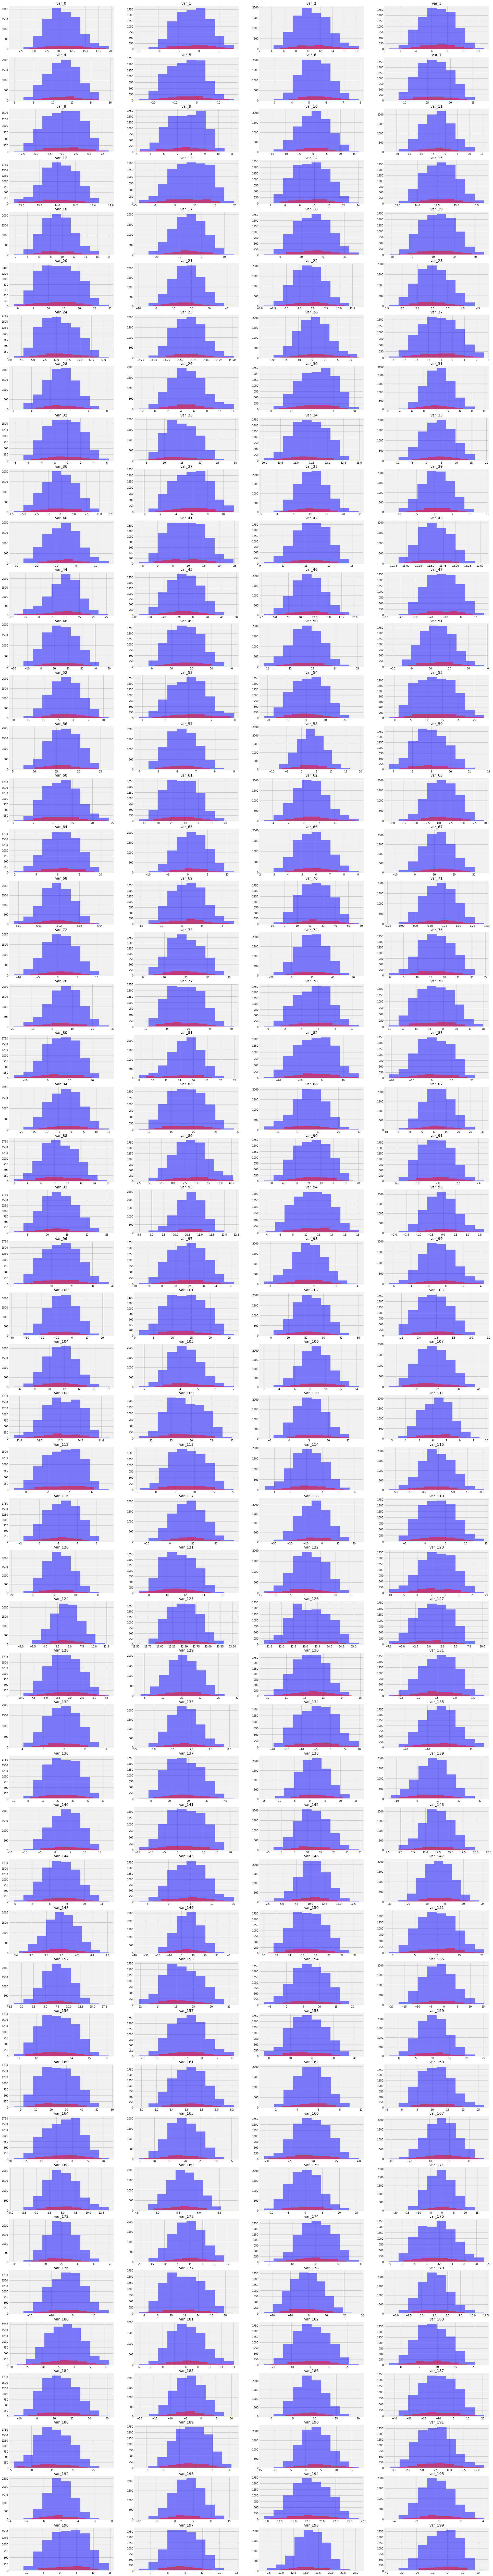

In [17]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(Cus_train[Cus_train["target"] == 0][col], alpha=0.5, label='0', color='b')
    plt.hist(Cus_train[Cus_train["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)
gc.collect();

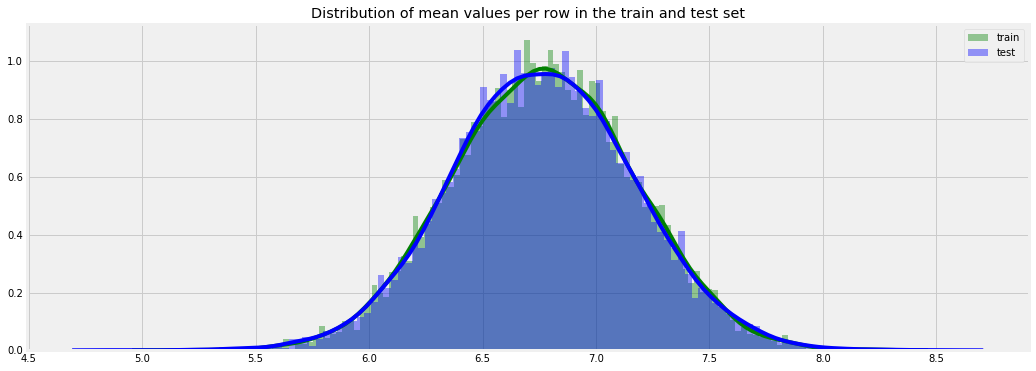

In [18]:
plt.figure(figsize=(16,6))
features = Cus_train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(Cus_train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(Cus_test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

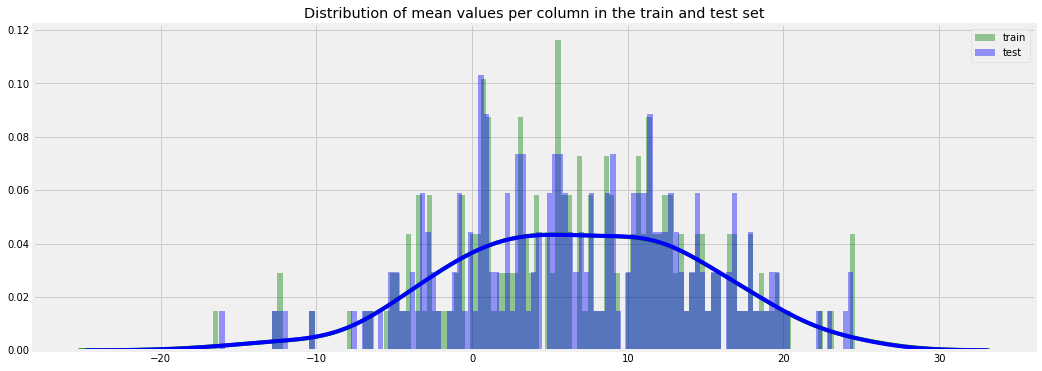

In [19]:
plt.figure(figsize=(16,6))
features = Cus_train.columns.values[2:202]
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(Cus_train[features].mean(axis=0),color="green", kde=True,bins=120, label='train')
sns.distplot(Cus_test[features].mean(axis=0),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

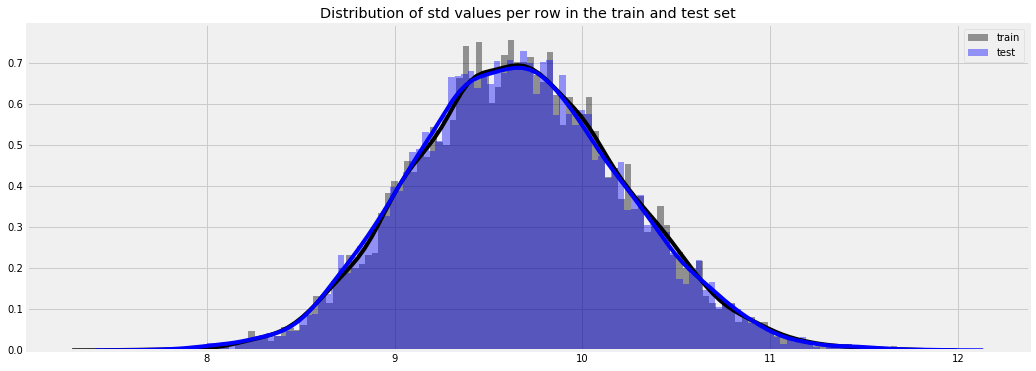

In [20]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(Cus_train[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(Cus_test[features].std(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend();plt.show()

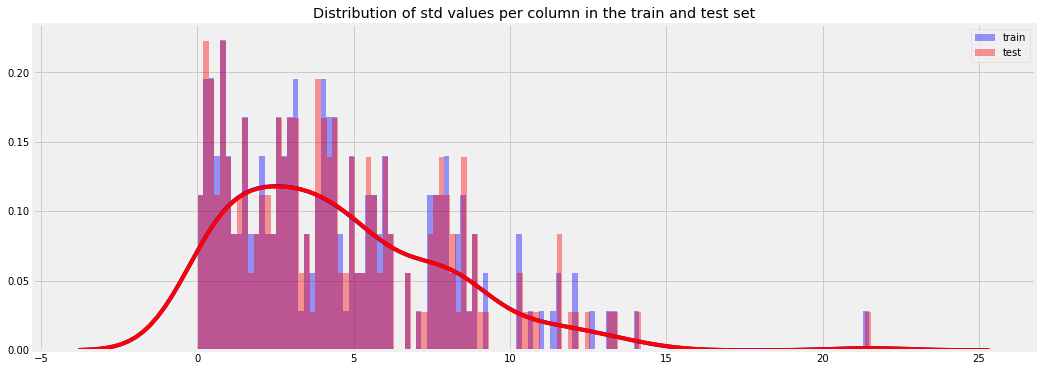

In [21]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(Cus_train[features].std(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(Cus_test[features].std(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

Most of the distributions show small std.deviations, and very few more than 20. Maybe a log transformation or a scaling technique to all features will alter the graph above to a normal one.

### Distribution of skew and kurtosis
Let's see now what is the distribution of skew values per rows and columns.

Let's see first the distribution of skewness calculated per rows in train and test sets

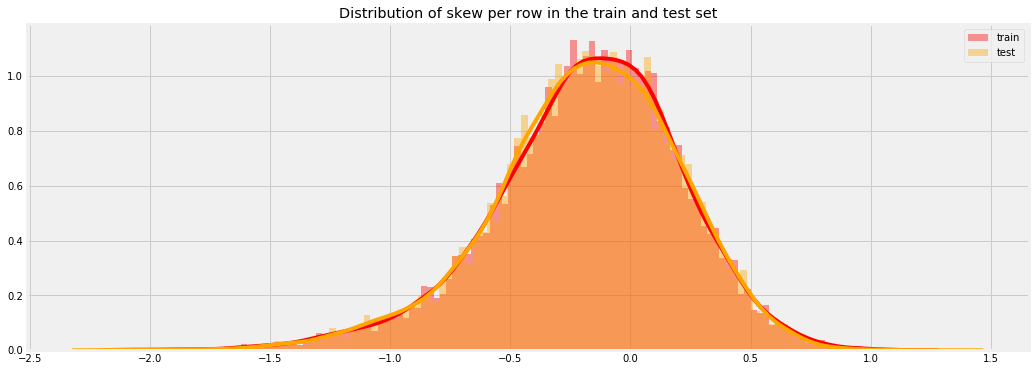

In [22]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per row in the train and test set")
sns.distplot(Cus_train[features].skew(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(Cus_test[features].skew(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

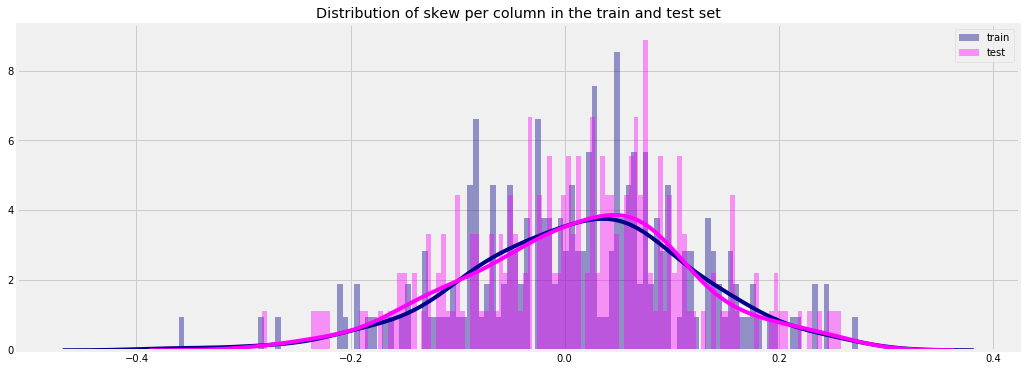

In [23]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(Cus_train[features].skew(axis=0),color="darkblue", kde=True,bins=120, label='train')
sns.distplot(Cus_test[features].skew(axis=0),color="magenta", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Let's see now what is the distribution of kurtosis values per rows and columns.

Let's see first the distribution of kurtosis calculated per rows in train and test sets.

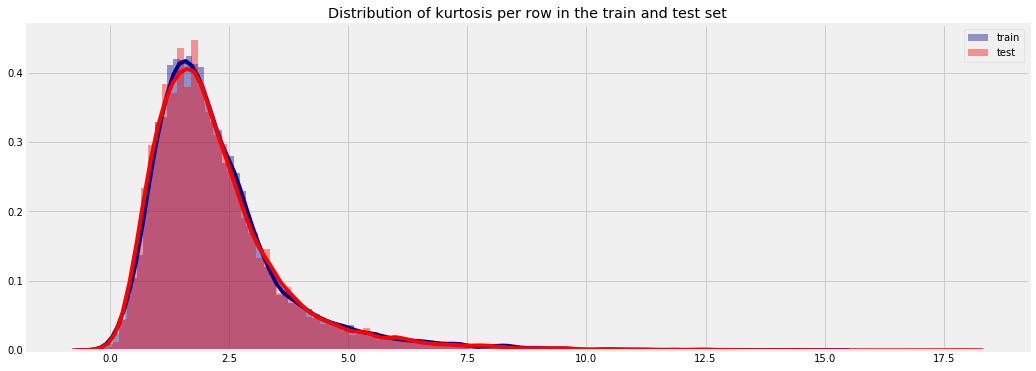

In [24]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per row in the train and test set")
sns.distplot(Cus_train[features].kurtosis(axis=1),color="darkblue", kde=True,bins=120, label='train')
sns.distplot(Cus_test[features].kurtosis(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

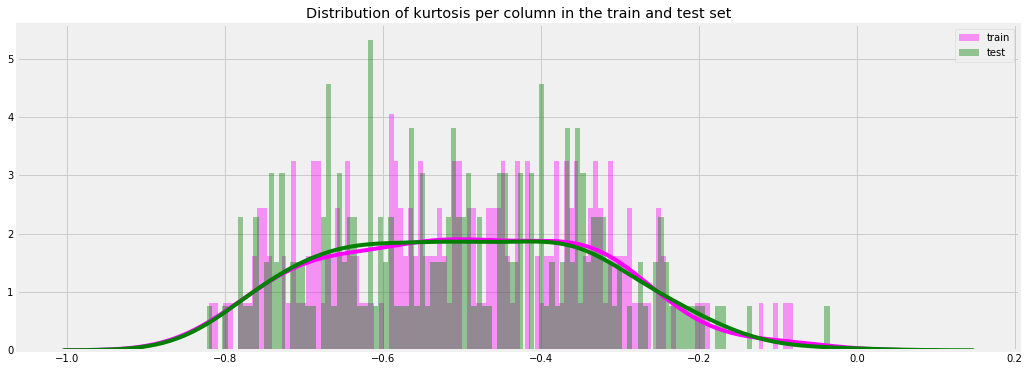

In [25]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per column in the train and test set")
sns.distplot(Cus_train[features].kurtosis(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(Cus_test[features].kurtosis(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Both Skewness and Kurtosis show that the features distributions are like a normal one.


## Missing Value Analysis

In [26]:
Cus_train.isna().sum().sum()

0

In [27]:
Cus_test.isna().sum().sum()

0

There are no missing values in Train and Test data 

## Feature Selection

In [28]:
df=Cus_train.copy()

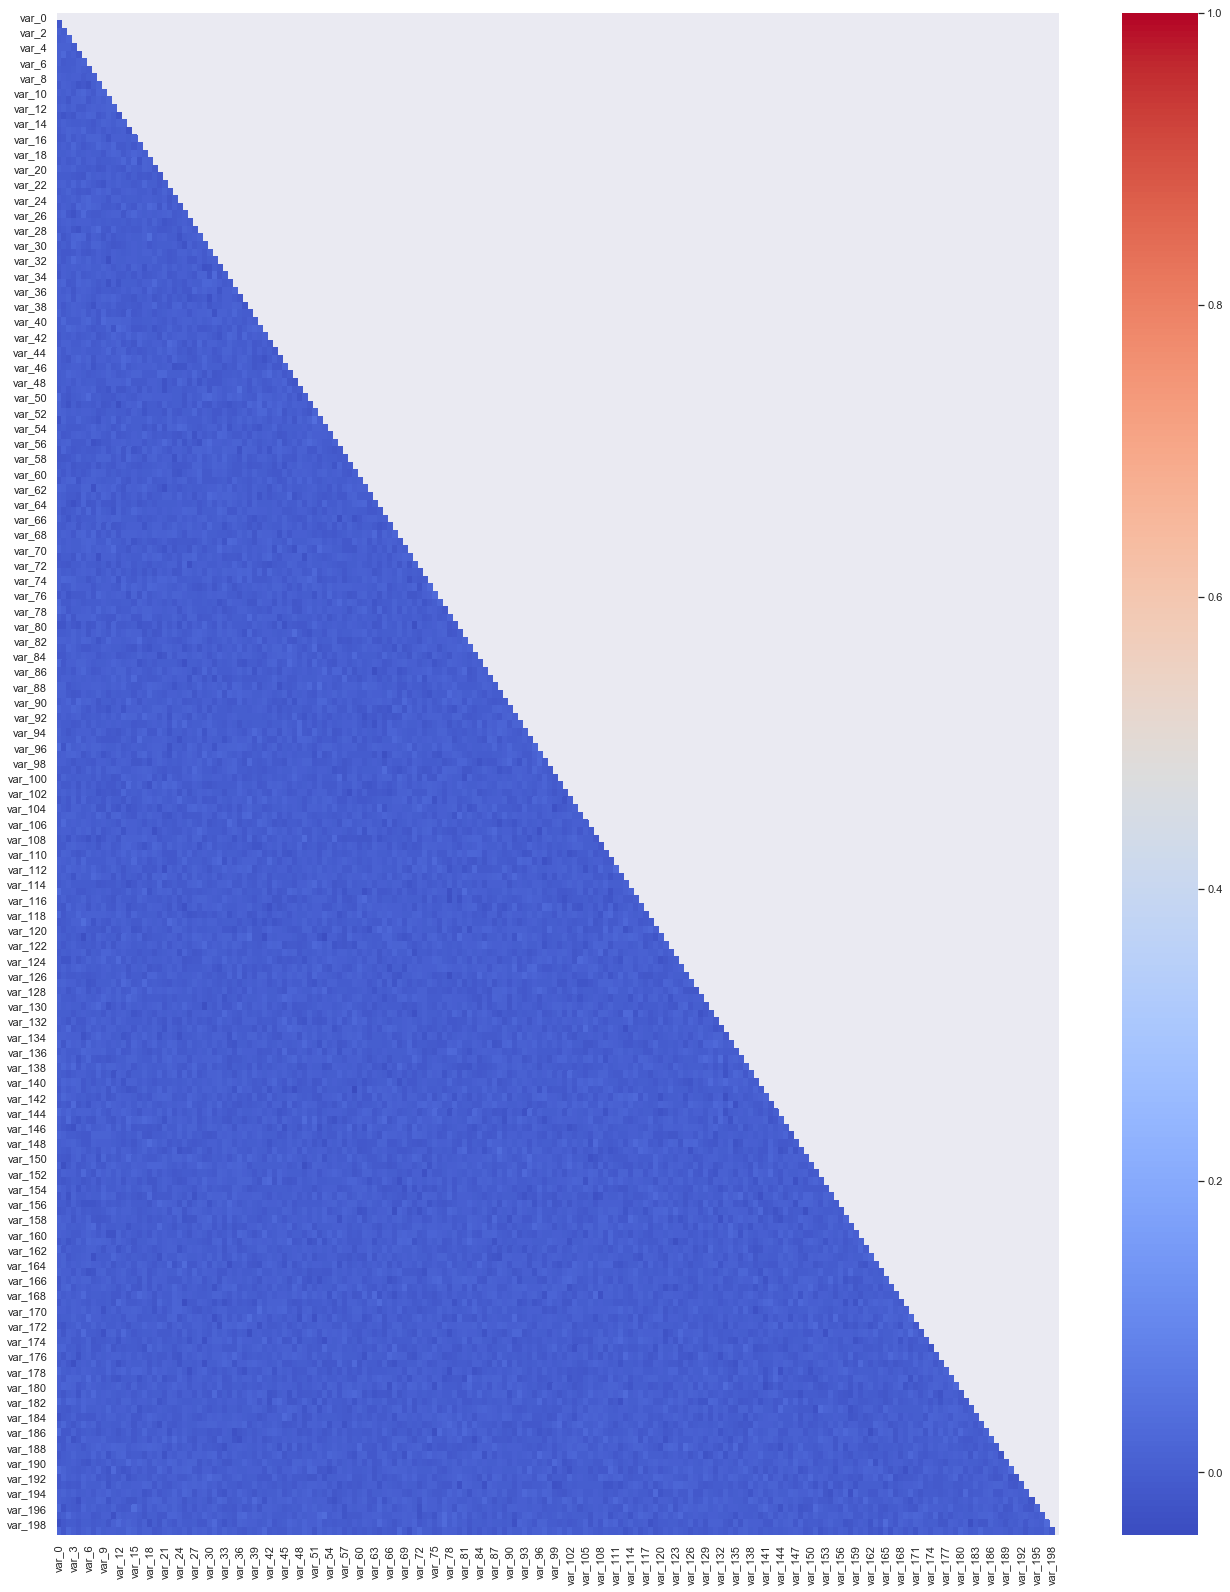

In [29]:
sns.set(rc={'figure.figsize':(20,28)})

# Compute the correlation matrix
corr = Cus_train[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

the above figure shows that most of the pearson correlations between the numerical data are close to zero, in fact is between 0 and 0.2. That means that most of the numerical data are almost uncorrelated between them.

## Feature Engineering

Let's calculate for starting few aggregated values for the existing features.



In [119]:
#Feature Engineering
idx = features = Cus_train.columns.values[2:202]
for df in [Cus_test, Cus_train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

In [120]:
Cus_train[Cus_train.columns[202:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1446.7378,-37.8489,40.9121,7.233689,9.497786,-0.132393,2.940025,6.78570
1,1349.0741,-26.5076,36.2994,6.745370,9.259042,-0.067781,1.321518,6.52180
2,1450.7626,-31.4984,54.1926,7.253813,9.681573,0.272724,3.421256,6.41490
3,1262.4139,-33.0995,27.5274,6.312069,9.055221,-0.437886,1.440909,6.48625
4,1465.6899,-23.8511,36.7349,7.328449,9.953071,-0.002209,0.587409,6.51120


In [121]:
Cus_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,train_53101,0,9.5779,-1.1448,10.2103,5.4965,11.8547,-6.4545,3.9606,20.1943,...,18.7698,-11.6723,1446.7378,-37.8489,40.9121,7.233689,9.497786,-0.132393,2.940025,6.78570
1,train_74424,0,15.1904,-5.0451,8.9406,6.2433,12.9933,-9.0867,4.4992,21.8463,...,18.0640,-1.2149,1349.0741,-26.5076,36.2994,6.745370,9.259042,-0.067781,1.321518,6.52180
2,train_114569,0,10.2005,-3.9381,12.2580,6.0077,12.3780,-3.0878,3.4989,14.5860,...,14.7799,11.6834,1450.7626,-31.4984,54.1926,7.253813,9.681573,0.272724,3.421256,6.41490
3,train_181638,1,14.5489,-9.2185,7.4017,8.1763,10.7966,-7.8961,4.9425,20.5848,...,12.9844,2.5465,1262.4139,-33.0995,27.5274,6.312069,9.055221,-0.437886,1.440909,6.48625
4,train_40335,0,13.1928,-3.4527,15.6737,6.6761,12.3140,-18.6930,4.4340,17.4016,...,18.6588,-19.0305,1465.6899,-23.8511,36.7349,7.328449,9.953071,-0.002209,0.587409,6.51120


In [122]:
Cus_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,test_53101,14.5931,-3.4130,12.2206,8.5927,12.2787,-0.1066,7.6984,17.3913,7.0487,...,12.9742,-3.1827,1463.5356,-17.9367,40.2833,7.317678,9.480678,0.361158,0.902351,6.53130
1,test_74424,5.9114,-3.4779,12.8391,6.7811,12.9037,-10.6888,5.0967,11.8057,-4.4972,...,13.1813,5.4344,1226.6844,-41.0584,45.0096,6.133422,9.785142,-0.662492,4.453195,6.17810
2,test_114569,12.3714,0.3485,13.6545,6.6014,8.8026,-10.0313,3.9339,17.6041,5.0323,...,9.0674,14.2244,1389.9965,-36.0183,39.3952,6.949983,9.706652,-0.558886,3.063557,7.11910
3,test_181638,12.8432,-1.1132,15.9820,7.3991,11.8261,-3.8494,5.6762,13.3164,-3.3855,...,12.5065,8.8211,1322.4640,-35.7617,37.1635,6.612320,9.644150,-0.492677,2.617459,6.48785
4,test_40335,7.9607,-0.9999,13.9064,5.1675,8.7360,-8.4352,4.3069,13.5813,2.9485,...,11.8314,-3.1253,1323.7056,-23.3404,43.2035,6.618528,9.404510,0.181288,1.824032,6.47330


In [123]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(15,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

Let's check the distribution of these new, engineered features.

We plot first the distribution of new features, grouped by value of corresponding target values

<Figure size 1440x2016 with 0 Axes>

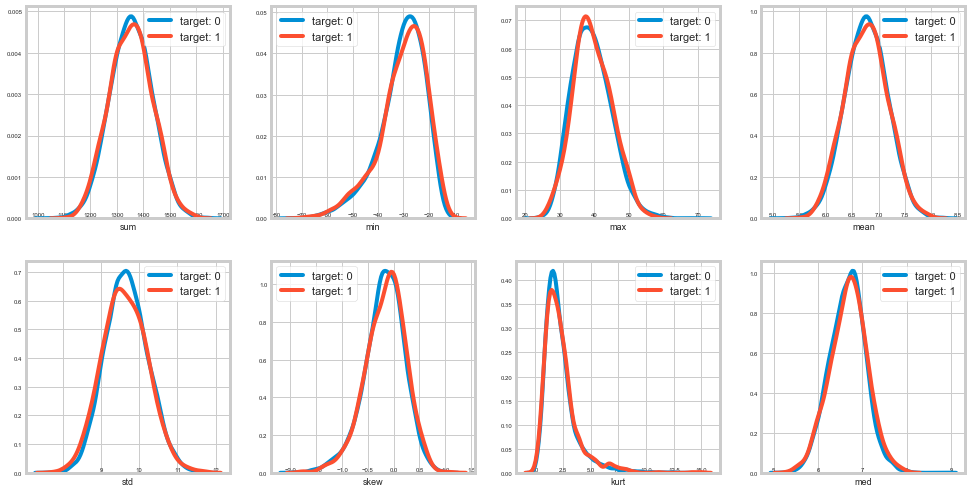

In [124]:
t0 = Cus_train.loc[Cus_train['target'] == 0]
t1 = Cus_train.loc[Cus_train['target'] == 1]
features = Cus_train.columns.values[202:]
plot_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

Let's show the distribution of new features values for train and test.

<Figure size 1440x2016 with 0 Axes>

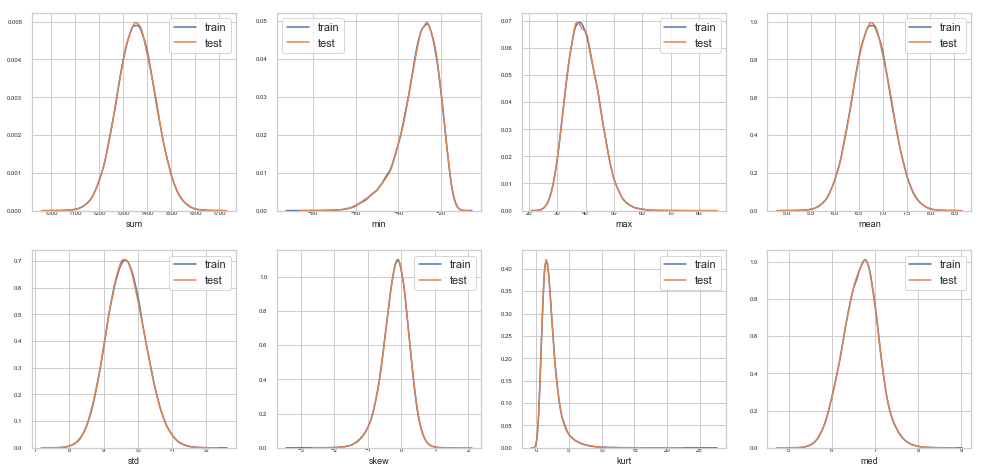

In [48]:
features = Cus_train.columns.values[202:]
plot_feature_distribution(Cus_train, Cus_test, 'train', 'test', features)

In [125]:
#Let's check how many features we have now.
print('Train and test columns: {} {}'.format(len(Cus_train.columns), len(Cus_test.columns)))

Train and test columns: 210 209


In [126]:
df1=Cus_train.copy()
df2=Cus_test.copy()
#Cus_train=df1.copy()
#Cus_train['ID_code']=Cus_train['ID_code'].astype(float)

In [127]:
#Using train test split
y = Cus_train['target']
X = Cus_train.drop(['target','ID_code'], axis=1)
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [128]:
(X_train.shape),(y_train.shape)

((7500, 208), (7500,))

Handling Imbalanced Data

In [156]:
#SMOTE Oversampling
#print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

#sm = SMOTE(random_state=2)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

#print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
#print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

#print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 753
Before OverSampling, counts of label '0': 6747 

After OverSampling, the shape of train_X: (13494, 208)
After OverSampling, the shape of train_y: (13494,) 

After OverSampling, counts of label '1': 6747
After OverSampling, counts of label '0': 6747


## Random Over sampling

In [129]:
X, y = make_classification(n_classes=2, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 6747, 1: 6747})


Prediction function

In [144]:

#Predicting & Stats Function

def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(compare, model_object.predict_proba(predictors)[:,1])
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('True Positive Rate / Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))
    print()
    # Calculate the AUC
    print ('AUC -: %0.2f' % auc(fpr, tpr))

## Model Level Approach
Logistic Regression

In [131]:

#train data on logistic Regression 
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#predict data using logistic Regression 
pred(logit_model,X_test,y_test)

# Output :------->>
# Accuracy :-  77.52
# True Negative Rate :-  78.3
# True Positive Rate / Recall :-  70.45
# False Negative Rate :-  29.55
# False Postive Rate :-  21.7
#AUC -: 0.84

CONFUSION MATRIX ------->> 
col_0      0    1
target           
0       1764  489
1       73    174

Classification paradox :------->>
Accuracy :-  77.52

True Negative Rate :-  78.3

True Positive Rate / Recall :-  70.45

False Negative Rate :-  29.55

False Postive Rate :-  21.7

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2253
           1       0.26      0.70      0.38       247

    accuracy                           0.78      2500
   macro avg       0.61      0.74      0.62      2500
weighted avg       0.89      0.78      0.82      2500


AUC -: 0.84


### KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#train data using KNN 
pred(KNN_Model,X_test,y_test)

# Output :------->>
# Accuracy :-  77.56
# True Negative Rate :-  84.47
# True Positive Rate / Recall :-  14.57
# False Negative Rate :-  85.43
# False Postive Rate :-  15.53
# AUC = 0.51

CONFUSION MATRIX ------->> 
col_0      0    1
target           
0       1903  350
1       211   36 

Classification paradox :------->>
Accuracy :-  77.56

True Negative Rate :-  84.47

True Positive Rate / Recall :-  14.57

False Negative Rate :-  85.43

False Postive Rate :-  15.53

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2253
           1       0.09      0.15      0.11       247

    accuracy                           0.78      2500
   macro avg       0.50      0.50      0.49      2500
weighted avg       0.82      0.78      0.80      2500


AUC -: 0.51


### Navie Bayes

In [134]:
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#train data using Naive Bayes
pred(Naive_model,X_test,y_test)

# Output :------->>
# Accuracy :-  80.96
# True Negative Rate :-  81.98
# True Positive Rate / Recall :- 71.66
# False Negative Rate :-  28.34
# False Postive Rate :-  18.02
# AUC = 0.86

CONFUSION MATRIX ------->> 
col_0      0    1
target           
0       1847  406
1       70    177

Classification paradox :------->>
Accuracy :-  80.96

True Negative Rate :-  81.98

True Positive Rate / Recall :-  71.66

False Negative Rate :-  28.34

False Postive Rate :-  18.02

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2253
           1       0.30      0.72      0.43       247

    accuracy                           0.81      2500
   macro avg       0.63      0.77      0.66      2500
weighted avg       0.90      0.81      0.84      2500


AUC -: 0.86


### Random Forest

In [157]:
# Training  Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=10, n_estimators = 50,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [158]:
#Validating Predictions
pred(final_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0      0   1
target          
0       2242  11
1       242   5 

Classification paradox :------->>
Accuracy :-  89.88

True Negative Rate :-  99.51

True Positive Rate / Recall :-  2.02

False Negative Rate :-  97.98

False Postive Rate :-  0.49

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2253
           1       0.31      0.02      0.04       247

    accuracy                           0.90      2500
   macro avg       0.61      0.51      0.49      2500
weighted avg       0.84      0.90      0.86      2500


AUC -: 0.63


### Light GBM

In [137]:
features = [c for c in Cus_train.columns if c not in ['ID_code', 'target']]
target = Cus_train['target']

In [138]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [142]:
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=101)
oof = np.zeros(len(Cus_train))
predictions = np.zeros(len(Cus_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(Cus_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(Cus_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(Cus_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 300)
    oof[val_idx] = clf.predict(Cus_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(Cus_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 300 rounds.
[100]	training's auc: 0.947539	valid_1's auc: 0.798333
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.947539	valid_1's auc: 0.798333
Fold 1
Training until validation scores don't improve for 300 rounds.
[100]	training's auc: 0.949265	valid_1's auc: 0.8131
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.949265	valid_1's auc: 0.8131
Fold 2
Training until validation scores don't improve for 300 rounds.
[100]	training's auc: 0.948218	valid_1's auc: 0.783056
Did not meet early stopping. Best iteration is:
[99]	training's auc: 0.949013	valid_1's auc: 0.784567
Fold 3
Training until validation scores don't improve for 300 rounds.
[100]	training's auc: 0.950486	valid_1's auc: 0.807378
Did not meet early stopping. Best iteration is:
[99]	training's auc: 0.950605	valid_1's auc: 0.808933
Fold 4
Training until validation scores don't improve for 300 rounds.
[100]	training's auc: 0.

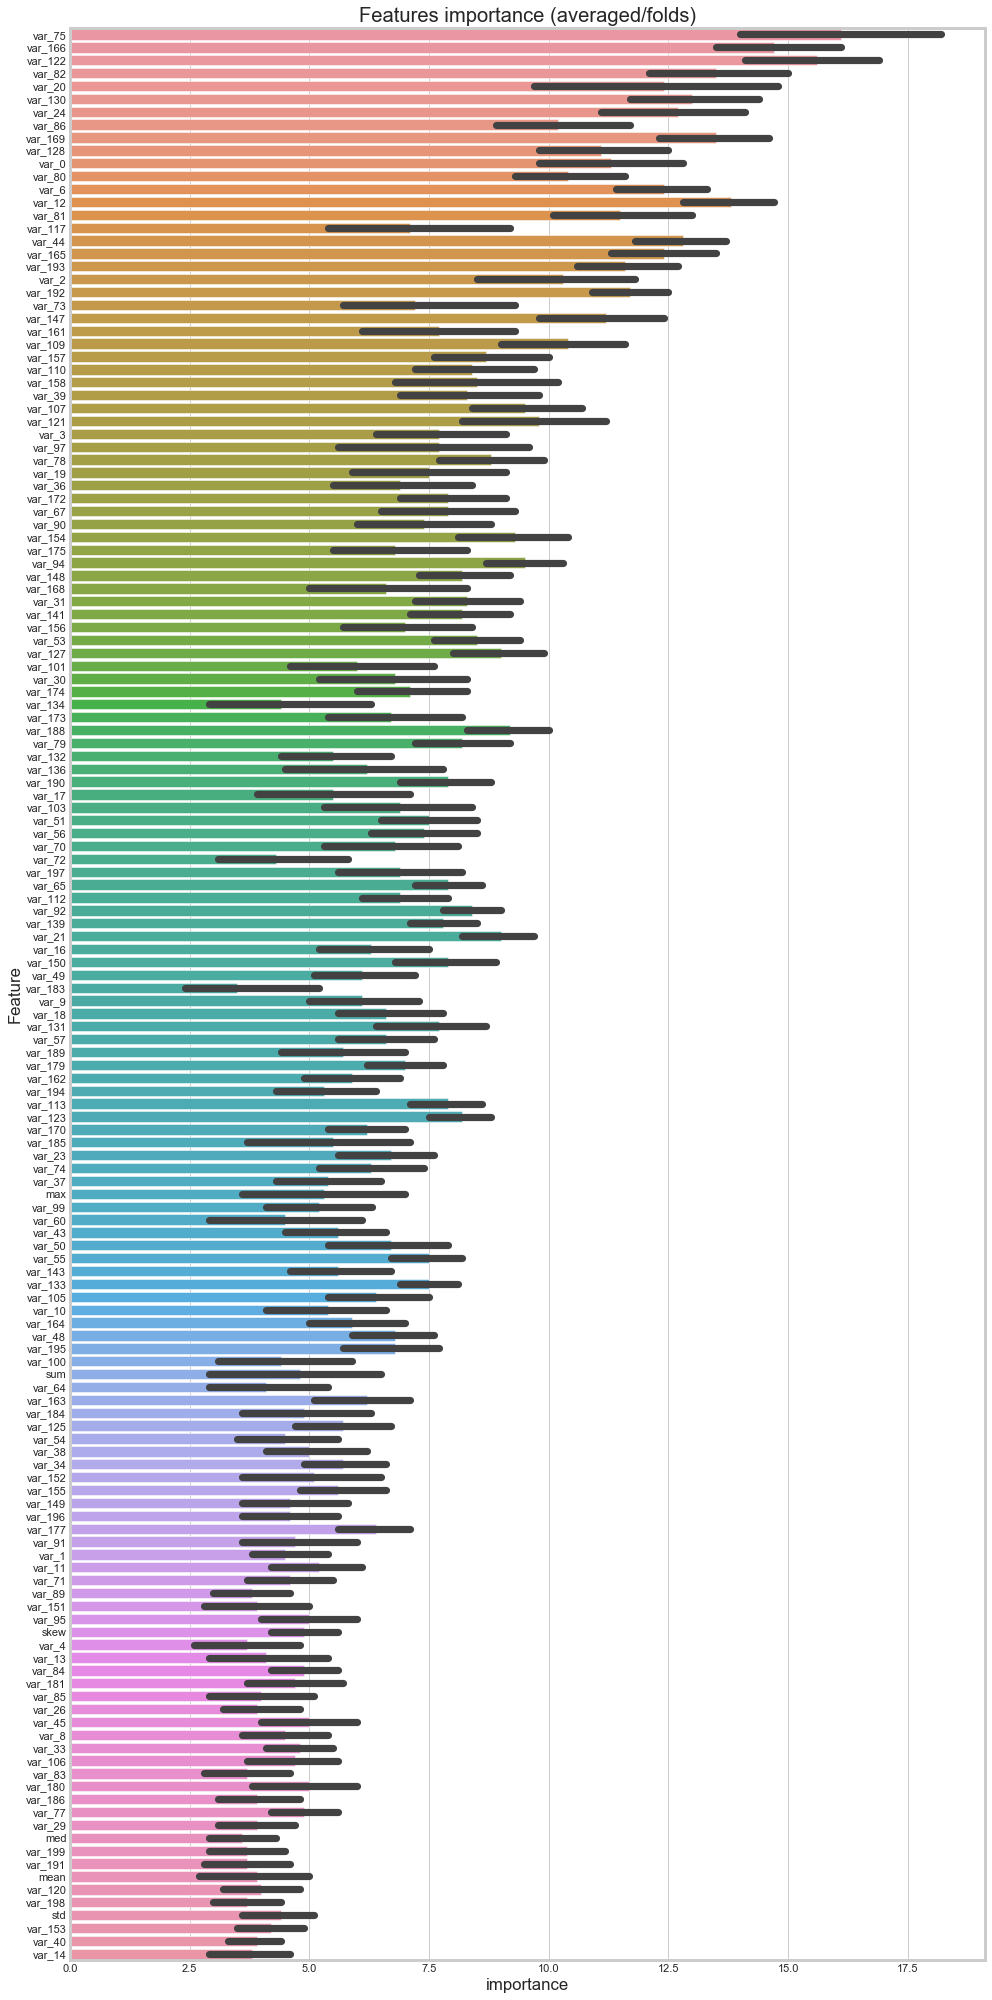

In [141]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

In [159]:
sub_df = pd.DataFrame({"ID_code":Cus_test["ID_code"].values})
sub_df["target"] = predictions
sub_df.to_csv("submission.csv", index=False)

Thank you